# The Pedestrian Detection Pipeline
In this notebook the tools created previously are used to detect pedestrians in a given input image. 
Therfore the following steps must be performed:
1. Get the input picture
2. Use sliding window and image pyramids to extract regions of interest 
3. Classify regions of interest with resnet50 adapted for pedestrian detection
4. Apply non maximum superssion to dispaly best fitting bounding boxes




In [1]:
# imports
import torch
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from torchvision import datasets, transforms, models
import os
import time
import numpy as np
from pathlib import Path
from imutils.object_detection import non_max_suppression

#### Load resnet50 trained for pedestrian detection:

In [2]:
# get model from library
model = models.resnet50(pretrained=True)
# remove original output layer and replace it with 2 dimensinal layer 
number_input_features  = model.fc.in_features
num_classes =2
model.fc = nn.Linear(number_input_features, num_classes)
# load model trained in second notebook
model.load_state_dict(torch.load('./saved_models/pedestrianClassifier12Epochs-iou45-2020-10-21-13-45-26.pt'))


<All keys matched successfully>

<class 'PIL.Image.Image'>


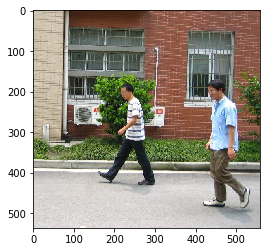

In [3]:
# get an image to test
from DataClass import PennFudanDataset
root = './data/PennFudanPed'
data = PennFudanDataset(root, transforms=None)

# display the selected image
sample_image = data[0]['img']
plt.imshow(sample_image)
print(type(sample_image))


#### Detect persons in images
The following code is outsourced to the file detection.py, to make it easily accessible later.

In [4]:
!pygmentize detection.py

# this file contains a transform and a detect function
# it is used inthe notebooks to detect a pedestrian in a given image


from helpers import sliding_window, image_pyramid, display_bounding_box
from torchvision import datasets, transforms, models
from imutils.object_detection import non_max_suppression
from torch import nn
import torch
import os
import numpy as np

def prediction_transforms(roi):
    '''
    transorms the input image to a format that can be read by the network
    
    params: 
            roi: region of interest (PIL.Image) that gets transformed into tensor 
            
    return:
            roi: roi in tensor format
    '''
    
    
    pred_transform = transforms.Compose([        
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    roi = pred_transform(roi)
        
    return roi

def detect_pedestrian(image, model, verbose=True, slidingWindow_parameters={'height':int(275),'width':

In [5]:
from helpers import sliding_window, image_pyramid, display_bounding_box

In [6]:
from detection import detect_pedestrian 

## Examples


Detected pedestrian at index 33.
Detected pedestrian at index 34.
Detected pedestrian at index 38.
Detected pedestrian at index 39.
Detected pedestrian at index 44.
Detected pedestrian at index 48.
Detected pedestrian at index 49.
Detected pedestrian at index 58.
Detected pedestrian at index 85.
Detected pedestrian at index 86.
CPU times: user 44.6 s, sys: 6.89 s, total: 51.5 s
Wall time: 26.3 s


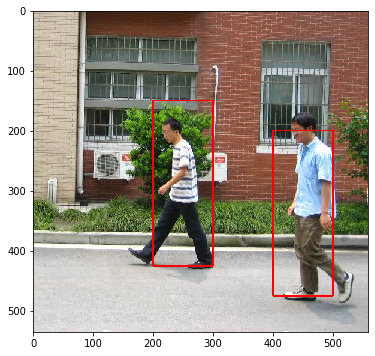

In [7]:
%%time
sample_image = data[0]['img']
boxes = detect_pedestrian(sample_image,model)
display_bounding_box(sample_image,boxes)

Detected pedestrian at index 6.
Detected pedestrian at index 14.
Detected pedestrian at index 15.
Detected pedestrian at index 22.
Detected pedestrian at index 30.
CPU times: user 15.6 s, sys: 2.28 s, total: 17.9 s
Wall time: 9.11 s


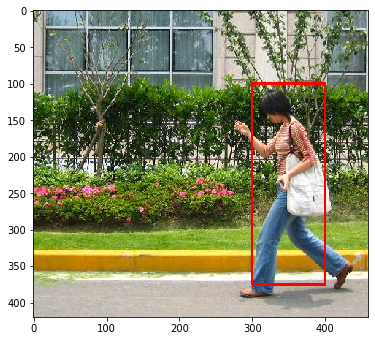

In [8]:
%%time
sample_image = data[10]['img']
boxes = detect_pedestrian(sample_image,model)
display_bounding_box(sample_image,boxes)

Detected pedestrian at index 22.
Detected pedestrian at index 30.
Detected pedestrian at index 31.
Detected pedestrian at index 37.
Detected pedestrian at index 38.
CPU times: user 19.9 s, sys: 2.71 s, total: 22.6 s
Wall time: 11.6 s


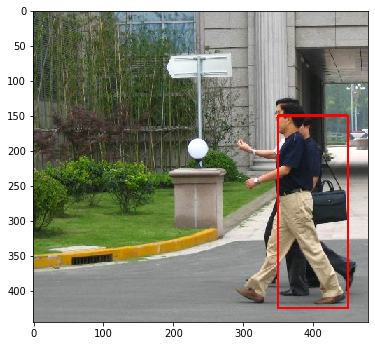

In [9]:
%%time
sample_image = data[2]['img']
boxes = detect_pedestrian(sample_image,model)
display_bounding_box(sample_image,boxes)

Detected pedestrian at index 4.
Detected pedestrian at index 10.
Detected pedestrian at index 16.
CPU times: user 9.31 s, sys: 1.23 s, total: 10.5 s
Wall time: 5.38 s


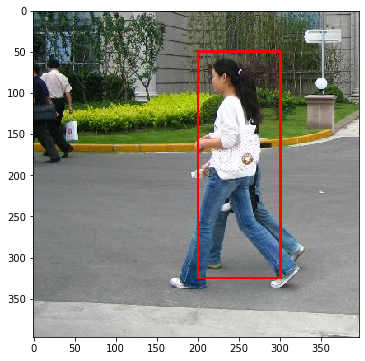

In [10]:
%%time
sample_image = data[3]['img']
boxes = detect_pedestrian(sample_image,model)
display_bounding_box(sample_image,boxes)

Detected pedestrian at index 4.
Detected pedestrian at index 9.
CPU times: user 5.03 s, sys: 607 ms, total: 5.64 s
Wall time: 2.88 s


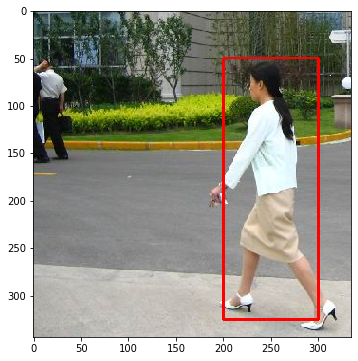

In [11]:
%%time
sample_image = data[4]['img']
boxes = detect_pedestrian(sample_image,model)
display_bounding_box(sample_image,boxes)